In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.dates import DateFormatter


In [81]:
columns = ['positive', 'negative', 'compound', 'polarity', 'subjectivity', 'pos', 'neg', 'neu','neutral']

In [82]:
fet = pd.read_csv('fettermanClassified2.csv',parse_dates=['date'])
oz = pd.read_csv('OzClassified1.csv', parse_dates=['date'])

In [83]:
oz.columns

Index(['date', 'content', 'id', 'likeCount', 'username', 'id.1', 'description',
       'followersCount', 'friendsCount', 'statusesCount', 'favouritesCount',
       'listedCount', 'mediaCount', 'location', 'neg', 'neu', 'pos',
       'compound', 'polarity', 'subjectivity', 'positive', 'negative',
       'neutral'],
      dtype='object')

In [84]:
def plot_trend(oz_input, fet_input, weighted_mean = False):
    
    if weighted_mean: 
        trend_fet = fet_input.groupby('date').apply(lambda x: pd.Series(np.average(x[columns], weights = x["likeCount"], axis = 0), columns))
        trend_oz = oz_input.groupby('date').apply(lambda x: pd.Series(np.average(x[columns], weights = x["likeCount"], axis = 0), columns))
    
    else:    
        trend_fet = fet_input.groupby('date')[columns].mean()
        trend_oz = oz_input.groupby('date')[columns].mean()
        
    fig, ax = plt.subplots(1, 2, figsize = (15, 6))


    color_map_democrats = ["#0015BC", "#0015BC", "#0015BC"]
    ax[0].stackplot(trend_fet.index, trend_fet.loc[:, 'positive'], trend_fet.loc[:, 'neutral'], trend_fet.loc[:, 'negative'], 
                  labels = ['Positive', 'Neutral', 'Negative'],
                colors = color_map_democrats)
    ax[0].plot(trend_fet.index, trend_fet.loc[:, 'positive'], color = 'white')
    ax[0].plot(trend_fet.index, trend_fet.loc[:, 'positive'] + trend_fet.loc[:, 'neutral'], color = 'white')

    children = ax[0].get_children()    
    children[0].set_alpha(1)
    children[1].set_alpha(0.6)
    children[2].set_alpha(0.2)

    ax[0].set_title('Tweets Trend over time for Democratic party (Fetterman)\n')
    ax[0].set_xlabel('\nTime')
    ax[0].set_ylabel('\nProportion of tweets')
    ax[0].legend()


    color_map_republicans = ["#DE0100", "#DE0100", "#DE0100"]
    ax[1].stackplot(trend_oz.index, trend_oz.loc[:, 'positive'], trend_oz.loc[:, 'neutral'], trend_oz.loc[:, 'negative'], 
                  labels = ['Positive', 'Neutral', 'Negative'],
                colors = color_map_republicans)
    ax[1].plot(trend_oz.index, trend_oz.loc[:, 'positive'], color = 'white')
    ax[1].plot(trend_oz.index, trend_oz.loc[:, 'positive'] + trend_oz.loc[:, 'neutral'], color = 'white')

    children = ax[1].get_children()    
    children[0].set_alpha(1)
    children[1].set_alpha(0.6)
    children[2].set_alpha(0.2)

    ax[1].set_title('Tweets Trend over time for Republican party (Dr. Oz)\n')
    ax[1].set_xlabel('\nTime')
    ax[1].set_ylabel('\nProportion of tweets')
    ax[1].legend()
    myFmt = DateFormatter("%m/%d")
    ax[0].xaxis.set_major_formatter(myFmt)
    ax[1].xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    plt.show()

    
    fig, ax = plt.subplots(1, 2, figsize = (16, 5))

    ax[0].plot(trend_fet.index, trend_fet.loc[:, 'polarity'], label = 'Fetterman', color = color_map_democrats[0])
    ax[0].plot(trend_oz.index, trend_oz.loc[:, 'polarity'], label = 'Dr. Oz', color = color_map_republicans[0])
    ax[0].grid()
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Polarity')
    ax[0].set_title('Polarity')
    ax[0].legend()

    ax[1].plot(trend_fet.index, trend_fet.loc[:, 'compound'], label = 'Fetterman', color = color_map_democrats[0])
    ax[1].plot(trend_oz.index, trend_oz.loc[:, 'compound'], label = 'Dr. Oz', color = color_map_republicans[0])
    ax[1].grid()
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Compound')
    ax[1].set_title('Compound')
    ax[1].legend()
    
    myFmt = DateFormatter("%m/%d")
    ax[0].xaxis.set_major_formatter(myFmt)
    ax[1].xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    plt.show()

    fig, ax = plt.subplots(1, 2, figsize = (16, 5))

    ax[0].plot(trend_fet.index, trend_fet.loc[:, 'positive'], label = 'Fetterman', color = color_map_democrats[0])
    ax[0].plot(trend_oz.index, trend_oz.loc[:, 'positive'], label = 'Dr. Oz', color = color_map_republicans[0])
    ax[0].grid()
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Positive Sentiment')
    ax[0].set_title('Positive Sentiment')
    ax[0].legend()

    ax[1].plot(trend_fet.index, trend_fet.loc[:, 'negative'], label = 'Fetterman', color = color_map_democrats[0])
    ax[1].plot(trend_oz.index, trend_oz.loc[:, 'negative'], label = 'Dr. Oz', color = color_map_republicans[0])
    ax[1].grid()
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Negative Sentment')
    ax[1].set_title('Negative Sentiment')
    ax[1].legend()
    
    myFmt = DateFormatter("%m/%d")
    ax[0].xaxis.set_major_formatter(myFmt)
    ax[1].xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    plt.show()
    
    fig, ax = plt.subplots(1, 1, figsize = (7.5, 5))

    ax.plot(trend_fet.index, trend_fet.loc[:, 'positive']-trend_fet.loc[:, 'negative'], label = 'Fetterman', color = color_map_democrats[0])
    ax.plot(trend_oz.index, trend_oz.loc[:, 'positive']- trend_oz.loc[:, 'negative'], label = 'Dr. Oz', color = color_map_republicans[0])
    ax.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel('(Positive -Negative) Sentiment')
    ax.set_title('(Positive -Negative) Sentiment')
    ax.legend()
    myFmt = DateFormatter("%m/%d")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    plt.show()
    



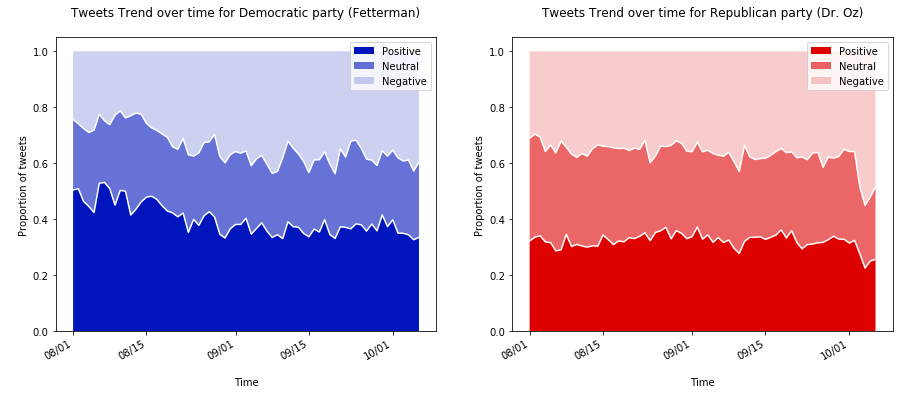

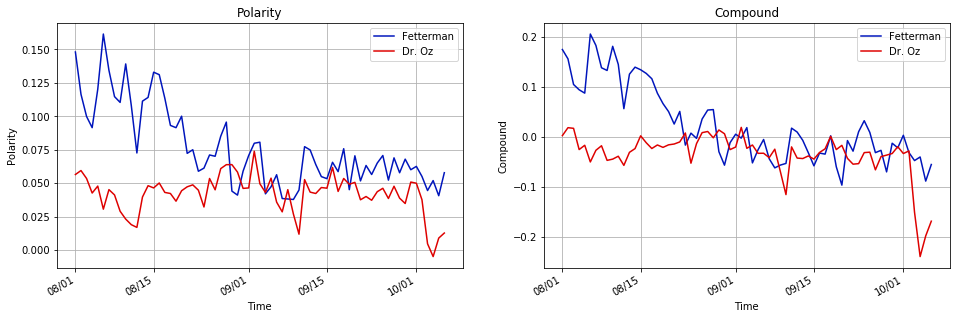

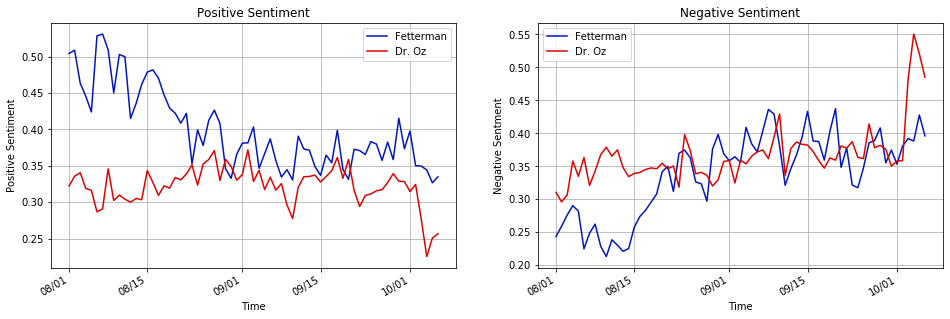

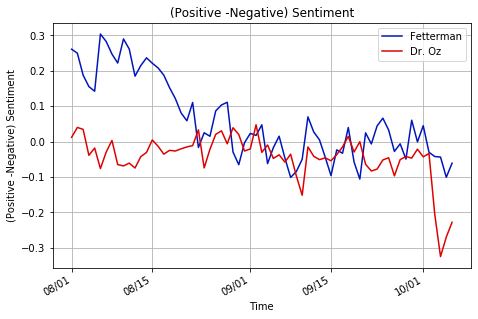

In [85]:
plot_trend(oz, fet)

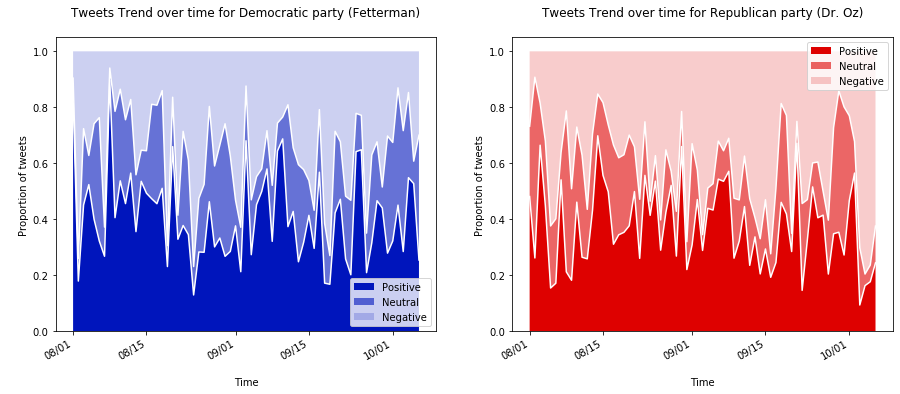

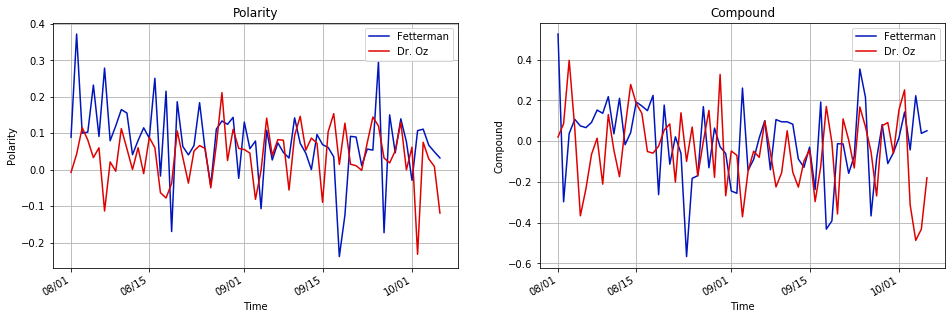

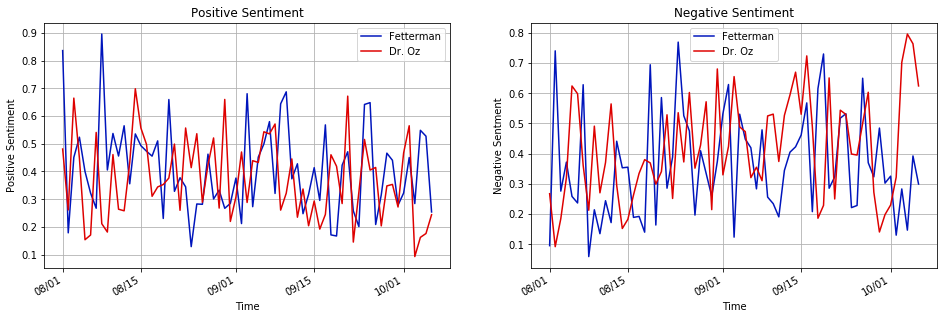

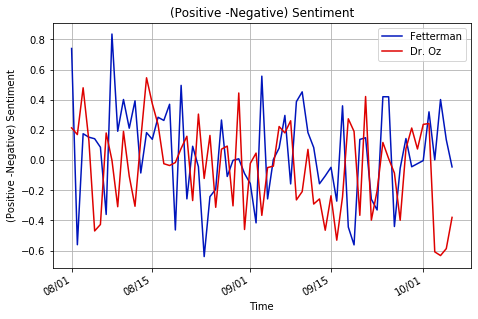

In [86]:
plot_trend(oz, fet, True)

In [87]:
# Filtering tweets with exclamation

/Users/srishti/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/srishti/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/srishti/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


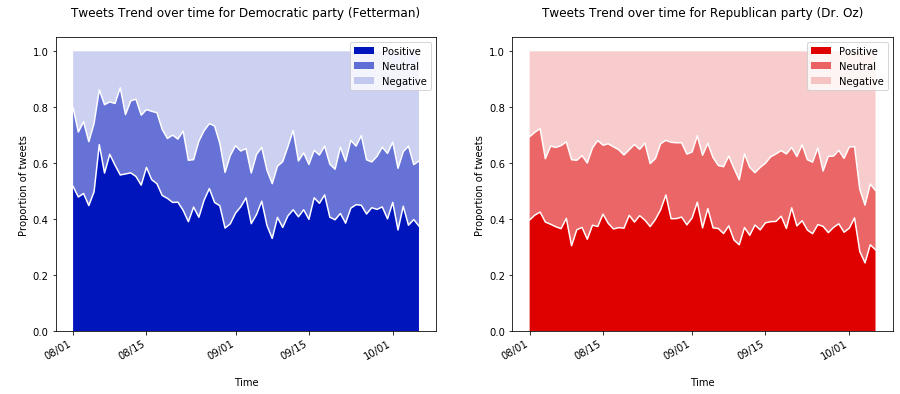

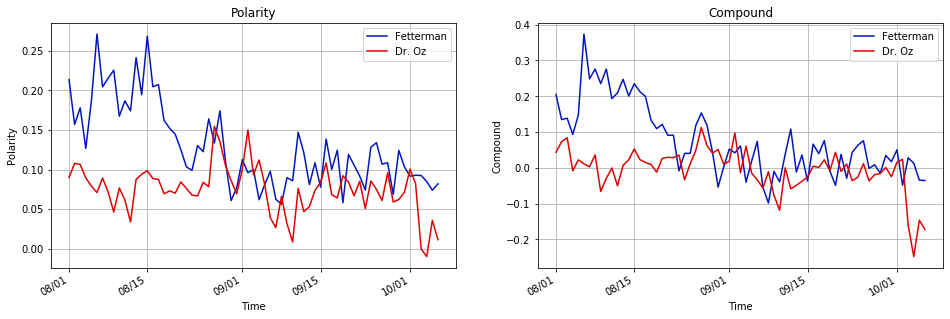

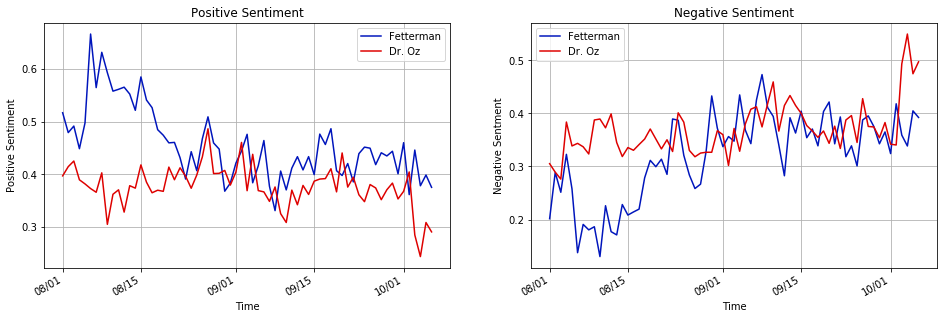

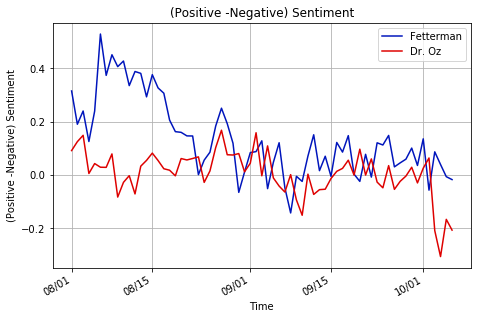

In [94]:
plot_trend(oz[(oz["content"].str.contains('!'))], fet[(fet["content"].str.contains('!'))]) 

In [97]:
fet.username

0                 Morna33
1             disco_remix
2            UpInTheHills
3         JakeFro19610091
4              MikeGolf86
               ...       
196921         rlhubbard3
196922    BidensExtremist
196923               bwco
196924    jsolomonReports
196925        ConnieM0917
Name: username, Length: 196926, dtype: object

In [98]:
with open('alpha.txt', 'r') as file:
        content = file.read()
h=[w for w in content.split() if w.startswith('@')]

In [114]:
for i in range(len(h)):
    h[i] = h[i][1:]

In [120]:
oz[oz["username"].isin(h)]

,date,content,id,likeCount,username,id.1,description,followersCount,friendsCount,statusesCount,...,location,neg,neu,pos,compound,polarity,subjectivity,positive,negative,neutral
146602,2022-08-17,You might’ve thought Dr. Oz just pushed snake ...,1559910175988916224,17,Wonkette,1559910175988916224,"""A pornographic rag and communist blog"" -- Lar...",74478,1346,145270,...,Detroit,0.129,0.842,0.028,-0.7319,-0.181818,0.727273,0,1,0
152741,2022-08-17,@Tough2TalkHost @DrOz @HerschelWalker Kelly is...,1559708937661960192,3,LarrySabato,1559708937661960192,"Director, UVA Center for Politics. Author, The...",205839,34848,48789,...,"Charlottesville, VA",0.162,0.838,0.000,-0.3623,0.000000,0.650000,0,1,0
152824,2022-08-17,@Tough2TalkHost @DrOz @HerschelWalker To me Ar...,1559708046661656577,9,LarrySabato,1559708046661656577,"Director, UVA Center for Politics. Author, The...",205839,34848,48789,...,"Charlottesville, VA",0.082,0.918,0.000,-0.1779,-0.500000,1.000000,0,1,0
164158,2022-08-18,"Dr. Oz Too Sleepy To Know What Grocery Stores,...",1560345832121049089,7,Wonkette,1560345832121049089,"""A pornographic rag and communist blog"" -- Lar...",74478,1346,145270,...,Detroit,0.000,1.000,0.000,0.0000,0.000000,0.000000,0,0,1
166366,2022-08-18,"Dr. Oz Too Sleepy To Know What Grocery Stores,...",1560319700759973888,13,Wonkette,1560319700759973888,"""A pornographic rag and communist blog"" -- Lar...",74478,1346,145270,...,Detroit,0.000,1.000,0.000,0.0000,0.000000,0.000000,0,0,1
166986,2022-08-18,Dr. Oz Fails Common 'How Many Houses Do You Ow...,1560314376841740288,22,Wonkette,1560314376841740288,"""A pornographic rag and communist blog"" -- Lar...",74478,1346,145270,...,Detroit,0.412,0.588,0.000,-0.8689,-0.100000,0.660000,0,1,0
173932,2022-08-18,You might’ve thought Dr. Oz just pushed snake ...,1560134455221800961,18,Wonkette,1560134455221800961,"""A pornographic rag and communist blog"" -- Lar...",74478,1346,145270,...,Detroit,0.129,0.842,0.028,-0.7319,-0.181818,0.727273,0,1,0
239000,2022-08-22,@beepea06 @TheOnion @DrOz That could be why Tr...,1561781137759997952,39,LarrySabato,1561781137759997952,"Director, UVA Center for Politics. Author, The...",205840,34849,48789,...,"Charlottesville, VA",0.000,0.818,0.182,0.2500,0.000000,0.000000,1,0,0
252657,2022-08-23,Is it possible that Dr. Oz is on the take from...,1562178371416723458,164,jbarro,1562178371416723458,"I write a newsletter (at joshbarro.com), I hos...",292535,1837,55156,...,"New York, New York",0.000,1.000,0.000,0.0000,0.000000,1.000000,0,0,1
254485,2022-08-23,"Dr. Oz spent years, millions improving Palm Be...",1562147105577345025,2,McClatchyDC,1562147105577345025,National journalism with local impact. McClatc...,43763,1349,79038,...,"Washington, D.C.",0.000,0.833,0.167,0.4215,-0.100000,0.100000,1,0,0


/Users/srishti/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/srishti/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/srishti/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


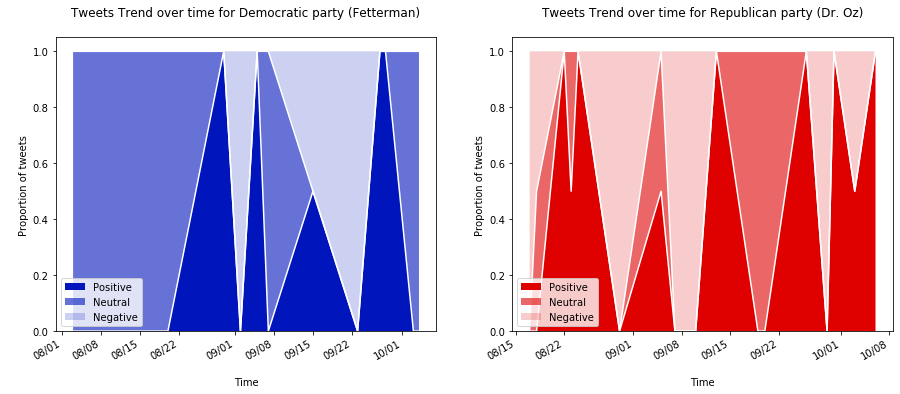

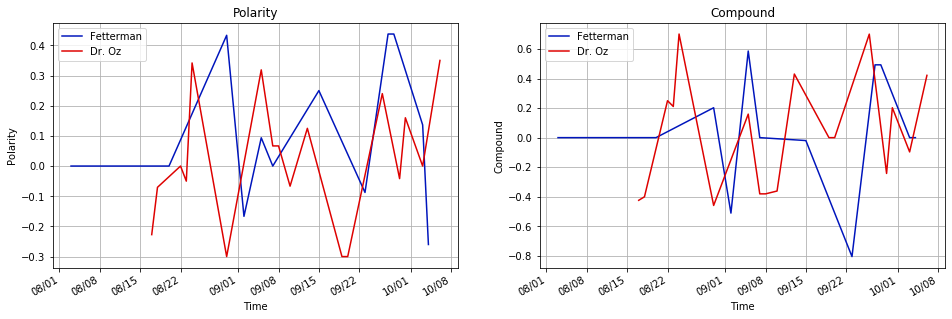

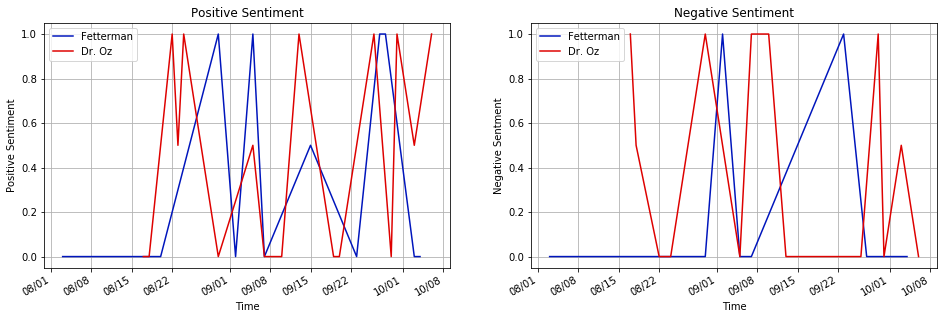

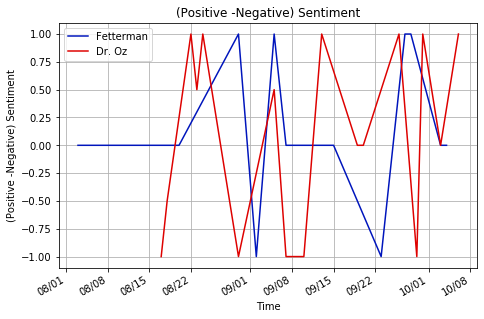

In [121]:
plot_trend(oz[oz["username"].isin(h)], fet[fet["username"].isin(h)]) 

In [124]:
oz[oz["username"].isin(h)].shape

(31, 23)

In [125]:
fet[fet["username"].isin(h)].shape

(16, 25)